# Challenge Set 4 (Linear Learning)¶

Topic: 

Date: 01/22/2016

Name: Kenneth Myers

Worked with: NA

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

%matplotlib inline

## Challenge 1

In [18]:
f = np.random.randn(1000)*1000
x = np.random.choice(np.arange(1,100000), 1000) + f
e = np.random.randn(1000)
y = np.log(x) + e

In [19]:
#print(log_data)

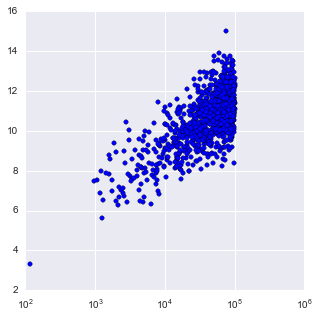

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')

plt.xscale('log')

### Quadratic fit

In [41]:
log_data = pd.DataFrame({'y':y, 'x':x})
log_data['const'] = [1 for i in range(len(x))]

In [52]:
def getQuadModel(data):
    model = smf.ols(formula='y ~ x**2 + const', data=data)
    results = model.fit()
    return results

In [66]:
def getPlot(results, title, ylabel='Y', xlabel='X', var=1):
    sm.graphics.plot_fit(results, var)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

In [53]:
quad_fit = getQuadModel(log_data)

In [54]:
quad_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     624.1
Date:                Sat, 23 Jan 2016   Prob (F-statistic):          2.61e-107
Time:                        13:35:49   Log-Likelihood:                -1517.5
No. Observations:                 997   AIC:                             3039.
Df Residuals:                     995   BIC:                             3049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.5213      0.035    128.583      0.000         4.452     4.590
x           3.018e-05   1.21e-06     24.981      0.000      2.78e-05  3.25e-05
const          4.5213      0.035    128.583      0.000         4.452     4.590
==============================================================================
Omnibus:                       13.721   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.931
Skew:                          -0.143   Prob(JB):                     7.75e-05
Kurtosis:                       3.611   Cond. No.                     1.16e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

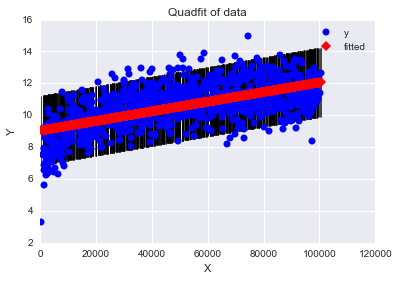

In [68]:
getPlot(quad_fit, title='Quadfit of data')

### Log fit

In [69]:
def getLogModel(data):
    model = smf.ols(formula='y ~ np.log(x) + const', data=data)
    results = model.fit()
    return results

In [70]:
log_fit = getLogModel(log_data)

In [71]:
log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     968.2
Date:                Sat, 23 Jan 2016   Prob (F-statistic):          5.23e-149
Time:                        13:46:11   Log-Likelihood:                -1421.4
No. Observations:                 997   AIC:                             2847.
Df Residuals:                     995   BIC:                             2857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2341      0.178     -1.315      0.189        -0.583     0.115
np.log(x)      1.0475      0.034     31.117      0.000         0.981     1.114
const         -0.2341      0.178     -1.315      0.189        -0.583     0.115
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.237
Skew:                           0.086   Prob(JB):                        0.539
Kurtosis:                       3.009   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

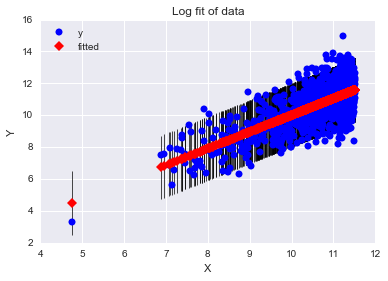

In [72]:
getPlot(log_fit, title='Log fit of data', var=1)

## Challenge 2